In [ ]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Connect to the database created by ingest.py
conn = sqlite3.connect('../data/pollution.db')
df = pd.read_sql("SELECT * FROM sensors", conn)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
                     PM2.5  PM10   SO2   NO2  TEMP    PRES  DEWP
timestamp                                                       
2013-03-01 00:00:00    4.0   4.0   4.0   7.0  -0.7  1023.0 -18.8
2013-03-01 01:00:00    8.0   8.0   4.0   7.0  -1.1  1023.2 -18.2
2013-03-01 02:00:00    7.0   7.0   5.0  10.0  -1.1  1023.5 -18.2
2013-03-01 03:00:00    6.0   6.0  11.0  11.0  -1.4  1024.5 -19.4
2013-03-01 04:00:00    3.0   3.0  12.0  12.0  -2.0  1025.2 -19.5


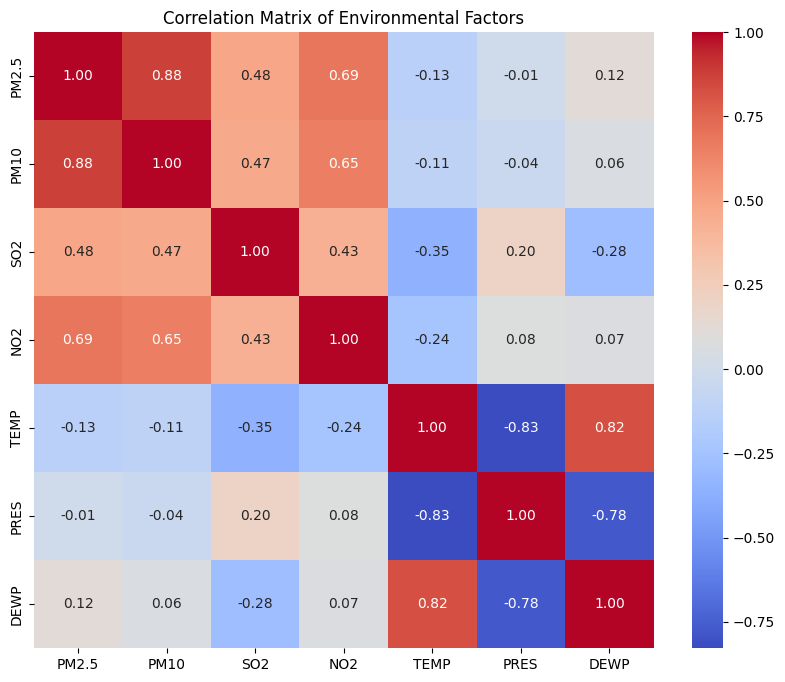

In [2]:
plt.figure(figsize=(10, 8))
# Calculate correlation matrix
corr = df.corr()
# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Environmental Factors')
# Save the image so README can see it
plt.savefig('../correlation_heatmap.png') 
plt.show()

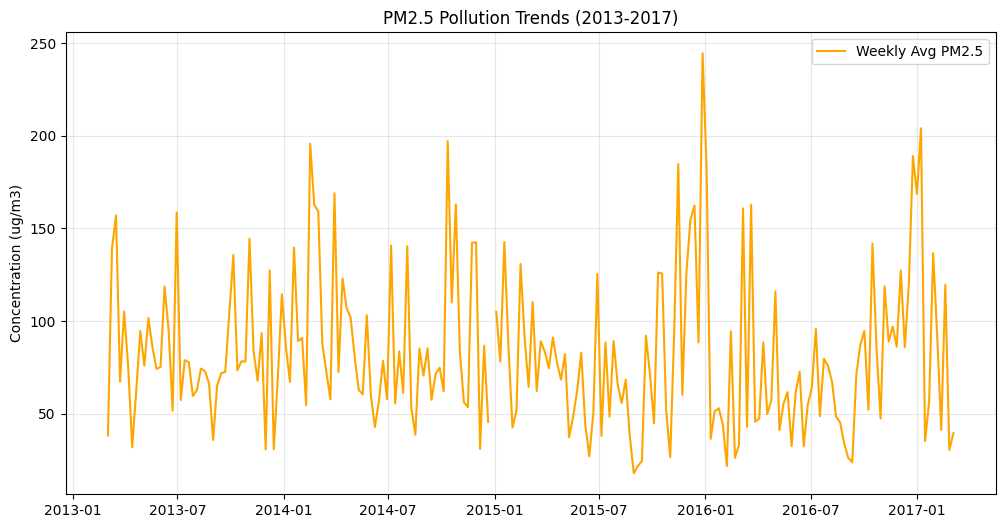

In [3]:
# Resample to weekly averages to make the graph readable
weekly_data = df['PM2.5'].resample('W').mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_data, label='Weekly Avg PM2.5', color='orange')
plt.title('PM2.5 Pollution Trends (2013-2017)')
plt.ylabel('Concentration (ug/m3)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('../timeseries.png') 
plt.show()